# Overbooking on Airlines
## Problem Definition
A low-cost airline, ACP (Flying High), operates four daily flights from Valencia to London at 10:00, 12:00, 14:00 and 16:00 hours. The first two flights hold 100 passengers and the last two can fly up to 150 passengers each. Should overbooking occur, which implies having sold more seats than the plane actually has, the airline can place a passenger on a later flight. Evidently each delayed traveller is compensated by being paid €200 plus €20 for each hour delayed. The firm  places delayed travellers on their own operating flights, or on one of the flights from other airlines departing at 20:00 hours, which always have available seats (a capacity of 999 passengers is always considered) at no extra charge.
Let us assume that at the beginning of the day we know that ACP has sold 110, 160, 100 and 100 seats on its four daily flights, respectively. Model this problem as a maximal flow model at a minimum cost in order to minimise the
airline’s total overbooking cost.

## Solution
We are going to use [networkx](https://networkx.github.io/) to draw the network and find the maximal flow at a minimum cost between two nodes. We are going to create a graph to model the selling process as a system with different states, Source state (containing node S), flights sold state (comprised of nodes 10s, 12s, 14s, 16s), flights used state (comprised of nodes 10u, 12u, 14u, 16u, and 20u), and a sink sate (containing node T). Edges are going to have two attributes: 

- $a_i$: maximum capacity in number of flight tickets sold or used
- $c_i$: cost, cost for the company to move a passanger from one adjacent node to the other

The flow of edges going from source node S to each flights sold state node flight represent the seats sold (edge S,10s represents the flights sold for flight at 10:00h, edge S,12s for the flight at 12:00s, etc). These flights have a capacity equal to the number of tickets sold (110, 160, 100 and 140 respectively), and a cost of 0;  
The flow of edges going from each flights sold state to each flight used state represents how the company arranges passengers in the different flights. The edges will have a maximum capacity equal to the maximum number of passengers in each flight (100, 100, 150, 150 and 999) respectively, and a cost equal to the overbooking cost for each delayed flight (that is, zero for no delay, 240 for two hours late, 280 for hours late, and so on).

Finally, flow in edges from the flights used state nodes to the sink node represent the total number of seats used in each plane. These edges will have a maximum capacity equal to the maximum capacity of each plane and a company cost of 0. 

{('S', '10s'): Text(0.5, 0.5, '0'),
 ('S', '12s'): Text(0.5, 0.835, '0'),
 ('S', '14s'): Text(0.5, 1.165, '0'),
 ('S', '16s'): Text(0.5, 1.5, '0'),
 ('10s', '10u'): Text(1.5, 0.0, '0'),
 ('10s', '12u'): Text(1.5, 0.25, '240'),
 ('10s', '14u'): Text(1.5, 0.5, '280'),
 ('10s', '16u'): Text(1.5, 0.75, '320'),
 ('10s', '20u'): Text(1.5, 1.0, '400'),
 ('12s', '12u'): Text(1.5, 0.585, '0'),
 ('12s', '14u'): Text(1.5, 0.835, '240'),
 ('12s', '16u'): Text(1.5, 1.085, '280'),
 ('12s', '20u'): Text(1.5, 1.335, '360'),
 ('14s', '14u'): Text(1.5, 1.165, '0'),
 ('14s', '16u'): Text(1.5, 1.415, '240'),
 ('14s', '20u'): Text(1.5, 1.665, '320'),
 ('16s', '16u'): Text(1.5, 1.75, '0'),
 ('16s', '20u'): Text(1.5, 2.0, '280'),
 ('10u', 'T'): Text(2.5, 0.5, '0'),
 ('12u', 'T'): Text(2.5, 0.75, '0'),
 ('14u', 'T'): Text(2.5, 1.0, '0'),
 ('16u', 'T'): Text(2.5, 1.25, '0'),
 ('20u', 'T'): Text(2.5, 1.5, '0')}

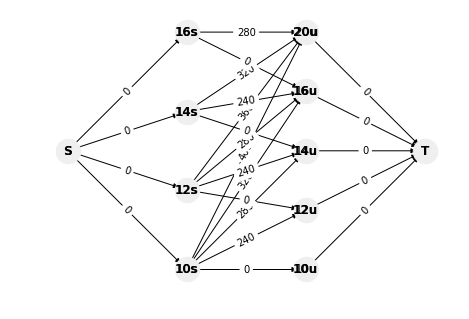

In [8]:
import pandas as pd
import networkx as nx
from IPython.display import display, Markdown

# Create an empty directed graph structure: 
G = nx.DiGraph()

# Add edges and define two attributes, production and costs:
G.add_edges_from([("S", "10s", {"capacity": 110, "cost": 0}),
    ("S", "12s", {"capacity": 160, "cost": 0}),
    ("S", "14s", {"capacity": 100, "cost": 0}),
    ("S", "16s", {"capacity": 140, "cost": 0}),
    ("10s", "10u", {"capacity": 100, "cost": 0}),
    ("10s", "12u", {"capacity": 100, "cost": 240}),
    ("10s", "14u", {"capacity": 150, "cost": 280}),
    ("10s", "16u", {"capacity": 150, "cost": 320}),
    ("10s", "20u", {"capacity": 999, "cost": 400}),
    ("12s", "12u", {"capacity": 100, "cost": 0}),
    ("12s", "14u", {"capacity": 150, "cost": 240}),
    ("12s", "16u", {"capacity": 150, "cost": 280}),
    ("12s", "20u", {"capacity": 999, "cost": 360}),
    ("14s", "14u", {"capacity": 150, "cost": 0}),
    ("14s", "16u", {"capacity": 150, "cost": 240}),
    ("14s", "20u", {"capacity": 999, "cost": 320}),
    ("16s", "16u", {"capacity": 150, "cost": 0}),
    ("16s", "20u", {"capacity": 999, "cost": 280}),
    ("10u", "T", {"capacity": 100, "cost": 0}),
    ("12u", "T", {"capacity": 100, "cost": 0}),
    ("14u", "T", {"capacity": 150, "cost": 0}),
    ("16u", "T", {"capacity": 150, "cost": 0}),
    ("20u", "T", {"capacity": 999, "cost": 0})])

# Draw the directed graph
pos = {"S": (0, 1),
       "10s": (1, 0),
       "12s": (1, 0.67),
       "14s": (1, 1.33),
       "16s": (1, 2),
       "10u": (2, 0),
       "12u": (2, 0.5),
       "14u": (2, 1),
       "16u": (2, 1.5),
       "20u": (2, 2),
       "T": (3, 1)   
      }

nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_labels(G, pos, font_weight='bold' )
c_label = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=c_label)


In [4]:
edges_df = nx.to_pandas_edgelist(G);
display(edges_df)

,source,target,capacity,cost
0,S,10s,110,0
1,S,12s,160,0
2,S,14s,100,0
3,S,16s,140,0
4,10s,10u,100,0
5,10s,12u,100,240
6,10s,14u,150,280
7,10s,16u,150,320
8,10s,20u,999,400
9,12s,12u,100,0


In [13]:
max_flow, flow= nx.maximum_flow(G, "S", "T", capacity='capacity')
costs = nx.get_edge_attributes(G, 'cost')
print("maximum flow value:", max_flow)
for k,v in flow.items():
    for k2 in v.keys():
        cost+=v[k2]*costs[(k,k2)]
        print("flow from ", k, " to ", k2, ": ", v[k2], "; Cost: ", v[k2]*costs[(k,k2)])

print ("Total cost is: ", cost)


maximum flow value: 510
flow from  S  to  10s :  110 ; Cost:  0
flow from  S  to  12s :  160 ; Cost:  0
flow from  S  to  14s :  100 ; Cost:  0
flow from  S  to  16s :  140 ; Cost:  0
flow from  10s  to  10u :  100 ; Cost:  0
flow from  10s  to  12u :  0 ; Cost:  0
flow from  10s  to  14u :  0 ; Cost:  0
flow from  10s  to  16u :  0 ; Cost:  0
flow from  10s  to  20u :  10 ; Cost:  4000
flow from  12s  to  12u :  100 ; Cost:  0
flow from  12s  to  14u :  50 ; Cost:  12000
flow from  12s  to  16u :  10 ; Cost:  2800
flow from  12s  to  20u :  0 ; Cost:  0
flow from  14s  to  14u :  100 ; Cost:  0
flow from  14s  to  16u :  0 ; Cost:  0
flow from  14s  to  20u :  0 ; Cost:  0
flow from  16s  to  16u :  140 ; Cost:  0
flow from  16s  to  20u :  0 ; Cost:  0
flow from  10u  to  T :  100 ; Cost:  0
flow from  12u  to  T :  100 ; Cost:  0
flow from  14u  to  T :  150 ; Cost:  0
flow from  16u  to  T :  150 ; Cost:  0
flow from  20u  to  T :  10 ; Cost:  0
Total cost is:  56400


{'S': {'10s': 110, '12s': 160, '14s': 100, '16s': 140}, '10s': {'10u': 100, '12u': 0, '14u': 0, '16u': 0, '20u': 10}, '12s': {'12u': 100, '14u': 50, '16u': 10, '20u': 0}, '14s': {'14u': 100, '16u': 0, '20u': 0}, '16s': {'16u': 140, '20u': 0}, '10u': {'T': 100}, '12u': {'T': 100}, '14u': {'T': 150}, '16u': {'T': 150}, '20u': {'T': 10}, 'T': {}}


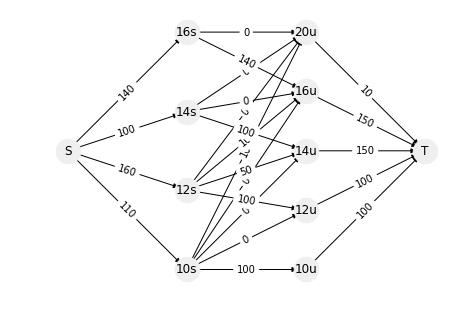

In [16]:
optimal_flow = {}
for i in G.nodes():
    for j in flow[i].keys():
        optimal_flow[i,j] = flow[i][j]

nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color='#efefef')
nx.draw_networkx_edge_labels(G, pos, edge_labels=optimal_flow)

print(flow)

In [20]:
flow_df = pd.DataFrame.from_dict(flow, orient='index')
display(flow_df)

,10s,12s,14s,16s,10u,12u,14u,16u,20u,T
10s,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,10.0,NaN
10u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
12s,NaN,NaN,NaN,NaN,NaN,100.0,50.0,10.0,0.0,NaN
12u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
14s,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,NaN
14u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0
16s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.0,0.0,NaN
16u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0
20u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
S,110.0,160.0,100.0,140.0,NaN,NaN,NaN,NaN,NaN,NaN
